In [101]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
df=pd.read_csv('faa_ai_prelim - faa_ai_prelim.csv')

In [17]:
df.head()

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-Feb-16,18-Feb-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-Feb-16,18-Feb-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-Feb-16,18-Feb-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-Feb-16,18-Feb-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.isnull().sum()

UPDATED                 0
ENTRY_DATE              0
EVENT_LCL_DATE          0
EVENT_LCL_TIME          0
LOC_CITY_NAME           0
LOC_STATE_NAME          0
LOC_CNTRY_NAME         81
RMK_TEXT                0
EVENT_TYPE_DESC         0
FSDO_DESC               2
REGIST_NBR              0
FLT_NBR                77
ACFT_OPRTR             76
ACFT_MAKE_NAME          5
ACFT_MODEL_NAME         4
ACFT_MISSING_FLAG      83
ACFT_DMG_DESC           9
FLT_ACTIVITY           70
FLT_PHASE               1
FAR_PART               82
MAX_INJ_LVL            64
FATAL_FLAG             75
FLT_CRW_INJ_NONE       19
FLT_CRW_INJ_MINOR      77
FLT_CRW_INJ_SERIOUS    82
FLT_CRW_INJ_FATAL      75
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK        82
PAX_INJ_NONE           66
PAX_INJ_MINOR          82
PAX_INJ_SERIOUS        80
PAX_INJ_FATAL          82
PAX_INJ_UNK            83
GRND_INJ_NONE          83
GRND_INJ_MIN

In [21]:
df.shape

(83, 41)

In [130]:
df['EVENT_LCL_DATE_TIME'] = pd.to_datetime(df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME'])
df.drop(['EVENT_LCL_DATE', 'EVENT_LCL_TIME'], axis=1, inplace=True)
df['EVENT_LCL_DATE_TIME']

C:\Users\rani\AppData\Local\Temp\ipykernel_35568\3645743504.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EVENT_LCL_DATE_TIME'] = pd.to_datetime(df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME'])


0    2016-02-19 00:45:00+00:00
1    2016-02-18 23:55:00+00:00
2    2016-02-18 22:14:00+00:00
3    2016-02-18 17:10:00+00:00
4    2016-02-18 00:26:00+00:00
                ...           
78   2015-12-31 17:00:00+00:00
79   2016-02-05 11:17:00+00:00
80   2016-02-05 23:02:00+00:00
81   2016-02-05 23:02:00+00:00
82   2016-02-02 01:52:00+00:00
Name: EVENT_LCL_DATE_TIME, Length: 83, dtype: datetime64[ns, UTC]

In [44]:
df.columns

Index(['UPDATED', 'ENTRY_DATE', 'LOC_CITY_NAME', 'LOC_STATE_NAME',
       'LOC_CNTRY_NAME', 'RMK_TEXT', 'EVENT_TYPE_DESC', 'FSDO_DESC',
       'REGIST_NBR', 'FLT_NBR', 'ACFT_OPRTR', 'ACFT_MAKE_NAME',
       'ACFT_MODEL_NAME', 'ACFT_MISSING_FLAG', 'ACFT_DMG_DESC', 'FLT_ACTIVITY',
       'FLT_PHASE', 'FAR_PART', 'MAX_INJ_LVL', 'FATAL_FLAG',
       'FLT_CRW_INJ_NONE', 'FLT_CRW_INJ_MINOR', 'FLT_CRW_INJ_SERIOUS',
       'FLT_CRW_INJ_FATAL', 'FLT_CRW_INJ_UNK', 'CBN_CRW_INJ_NONE',
       'CBN_CRW_INJ_MINOR', 'CBN_CRW_INJ_SERIOUS', 'CBN_CRW_INJ_FATAL',
       'CBN_CRW_INJ_UNK', 'PAX_INJ_NONE', 'PAX_INJ_MINOR', 'PAX_INJ_SERIOUS',
       'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GRND_INJ_NONE', 'GRND_INJ_MINOR',
       'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK',
       'EVENT_LCL_DATE_TIME'],
      dtype='object')

In [133]:
new_df=df[['ACFT_MAKE_NAME','LOC_STATE_NAME','ACFT_MODEL_NAME','ACFT_DMG_DESC','RMK_TEXT','FLT_PHASE','EVENT_TYPE_DESC','FATAL_FLAG']]

In [134]:
new_df.sample()

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,ACFT_DMG_DESC,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG
41,CESSNA,California,150,Substantial,"AIRCRAFT, N704SL CESSNA 150, AND N57BC AVIAT ...",STANDING (STD),Accident,NaN


In [135]:
new_df.isnull().sum()

ACFT_MAKE_NAME      5
LOC_STATE_NAME      0
ACFT_MODEL_NAME     4
ACFT_DMG_DESC       9
RMK_TEXT            0
FLT_PHASE           1
EVENT_TYPE_DESC     0
FATAL_FLAG         75
dtype: int64

In [136]:
new_df['FATAL_FLAG'].values

array(['Yes', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Yes', nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, 'Yes', nan, 'Yes', nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [137]:
new_df['FATAL_FLAG'].fillna('No',inplace=True)


C:\Users\rani\AppData\Local\Temp\ipykernel_35568\4282681830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['FATAL_FLAG'].fillna('No',inplace=True)
C:\Users\rani\AppData\Local\Temp\ipykernel_35568\4282681830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FATAL_FLAG'].fillna('No',inplace=True)


In [138]:
new_df['FATAL_FLAG'].values


array(['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [69]:
new_df['FLT_PHASE'].mode()

0    LANDING (LDG)
Name: FLT_PHASE, dtype: object

In [140]:
mode_val=new_df['FLT_PHASE'].mode()
print('mode: ',mode_val)
#new_df['FLT_PHASE']=new_df['FLT_PHASE'].fillna(mode_val,inplace=True)
#new_df['ACFT_DMG_DESC']=new_df['ACFT_DMG_DESC'].fillna(new_df['ACFT_DMG_DESC'].mode(),inplace=True)
new_df=new_df.fillna({'ACFT_DMG_DESC':new_df['ACFT_DMG_DESC'].mode()[0],'FLT_PHASE':new_df['FLT_PHASE'].mode()[0]})

mode:  0    LANDING (LDG)
Name: FLT_PHASE, dtype: object


In [142]:
new_df['FLT_PHASE'].values,new_df['ACFT_DMG_DESC'].values

(array(['UNKNOWN (UNK)', 'LANDING (LDG)', 'APPROACH (APR)',
        'LANDING (LDG)', 'LANDING (LDG)', 'UNKNOWN (UNK)', 'LANDING (LDG)',
        'LANDING (LDG)', 'TAKEOFF (TOF)', 'LANDING (LDG)', 'LANDING (LDG)',
        'LANDING (LDG)', 'LANDING (LDG)', 'LANDING (LDG)', 'TAKEOFF (TOF)',
        'LANDING (LDG)', 'TAKEOFF (TOF)', 'LANDING (LDG)', 'TAKEOFF (TOF)',
        'LANDING (LDG)', 'LANDING (LDG)', 'UNKNOWN (UNK)', 'TAKEOFF (TOF)',
        'TAXI (TXI)', 'LANDING (LDG)', 'LANDING (LDG)', 'LANDING (LDG)',
        'TAXI (TXI)', 'TAXI (TXI)', 'LANDING (LDG)', 'LANDING (LDG)',
        'TAXI (TXI)', 'TAXI (TXI)', 'TAXI (TXI)', 'STANDING (STD)',
        'STANDING (STD)', 'TAKEOFF (TOF)', 'LANDING (LDG)', 'TAXI (TXI)',
        'LANDING (LDG)', 'UNKNOWN (UNK)', 'STANDING (STD)',
        'LANDING (LDG)', 'LANDING (LDG)', 'LANDING (LDG)', 'LANDING (LDG)',
        'LANDING (LDG)', 'LANDING (LDG)', 'UNKNOWN (UNK)', 'LANDING (LDG)',
        'TAXI (TXI)', 'LANDING (LDG)', 'UNKNOWN (UNK)', 'UNKNOW

In [148]:
updated_df = df[~df['ACFT_MODEL_NAME'].isnull()]
updated_df = updated_df.loc[:, df.count() > 75]


In [152]:
df.isnull().sum(),updated_df.isnull().sum()

(UPDATED                 0
 ENTRY_DATE              0
 EVENT_LCL_DATE          0
 EVENT_LCL_TIME          0
 LOC_CITY_NAME           0
 LOC_STATE_NAME          0
 LOC_CNTRY_NAME         81
 RMK_TEXT                0
 EVENT_TYPE_DESC         0
 FSDO_DESC               2
 REGIST_NBR              0
 FLT_NBR                77
 ACFT_OPRTR             76
 ACFT_MAKE_NAME          5
 ACFT_MODEL_NAME         4
 ACFT_MISSING_FLAG      83
 ACFT_DMG_DESC           9
 FLT_ACTIVITY           70
 FLT_PHASE               1
 FAR_PART               82
 MAX_INJ_LVL            64
 FATAL_FLAG             75
 FLT_CRW_INJ_NONE       19
 FLT_CRW_INJ_MINOR      77
 FLT_CRW_INJ_SERIOUS    82
 FLT_CRW_INJ_FATAL      75
 FLT_CRW_INJ_UNK        83
 CBN_CRW_INJ_NONE       83
 CBN_CRW_INJ_MINOR      83
 CBN_CRW_INJ_SERIOUS    83
 CBN_CRW_INJ_FATAL      83
 CBN_CRW_INJ_UNK        82
 PAX_INJ_NONE           66
 PAX_INJ_MINOR          82
 PAX_INJ_SERIOUS        80
 PAX_INJ_FATAL          82
 PAX_INJ_UNK            83
 

In [149]:
#original 83*41

df.shape,updated_df.shape

((83, 42), (79, 13))

In [153]:
updated_df.sample()

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,ACFT_MAKE_NAME,ACFT_MODEL_NAME,FLT_PHASE
29,No,16-Feb-16,13-Feb-16,17:45:00Z,DURANGO,Colorado,"AIRCRAFT LANDED GEAR UP, DURANGO, CO",Incident,FAA Salt Lake City FSDO-07,N5555G,CESSNA,210,LANDING (LDG)


In [159]:
grouped = updated_df.groupby('ACFT_MODEL_NAME')
updated_df['ACFT_MODEL_NAME'].unique(),grouped.size()

(array(['36', 'RV7', '172', '235', '206', 'PA24', '210', '747', 'FIREFLY',
        '310', 'T34', '152', 'EAGLE II', 'PA34', 'PA28', '150', '369',
        '737', 'GC1B', 'PA20', '2T1A', '560', 'BT15', 'PT19', 'TB9', '340',
        'ERJ190', 'M4', '55', 'M20M', 'S2', '140', 'RX8', '180', '8KCAB',
        '47G', 'A319', 'AA1', 'GULFSTREAM200', 'TB21', '182', 'CTLS',
        'KITFOX', '33', '175', 'PA31', 'IV', '35', 'M20K', '500', 'M20E',
        'NA265', 'O58B', 'F51'], dtype=object),
 ACFT_MODEL_NAME
 140              1
 150              3
 152              2
 172              4
 175              1
 180              1
 182              2
 206              3
 210              4
 235              1
 2T1A             1
 310              2
 33               1
 340              1
 35               3
 36               3
 369              1
 47G              1
 500              1
 55               1
 560              1
 737              2
 747              1
 8KCAB            2
 A319          

In [160]:
aircraft_counts = df['ACFT_MODEL_NAME'].value_counts().reset_index(name='Count')
aircraft_counts.columns = ['ACFT_MODEL_NAME', 'Count']


C:\Users\rani\AppData\Local\Temp\ipykernel_35568\1084715971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='ACFT_MODEL_NAME', data=aircraft_counts, palette='viridis')


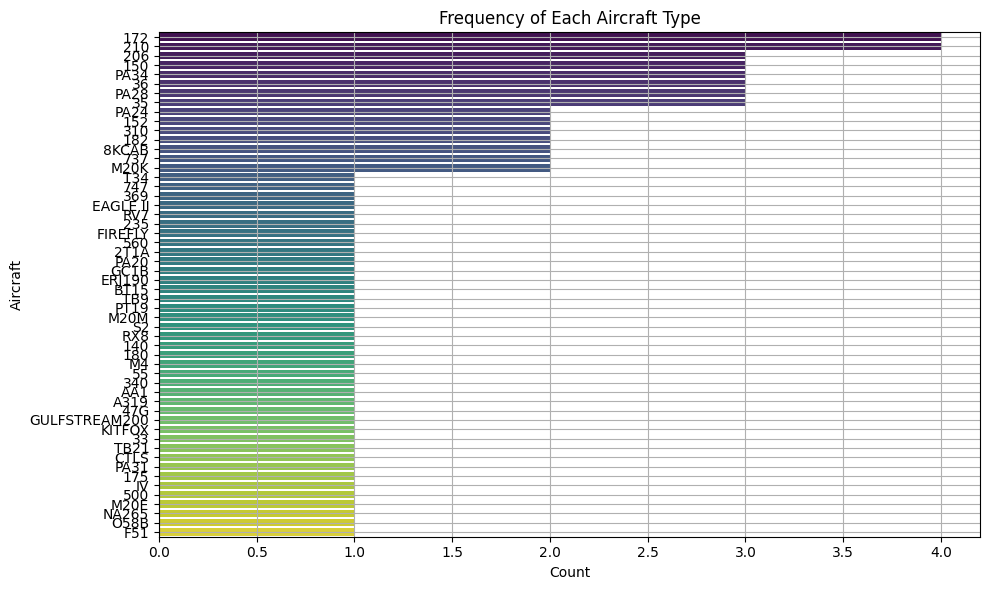

In [161]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='ACFT_MODEL_NAME', data=aircraft_counts, palette='viridis')
plt.title('Frequency of Each Aircraft Type')
plt.xlabel('Count')
plt.ylabel('Aircraft')
plt.grid()
plt.tight_layout()
plt.show()

In [115]:
df[df['FATAL_FLAG']=='Yes']

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,No,17-Feb-16,16-Feb-16,20:52:00Z,BUCKEYE,Arizona,NaN,"AIRCRAFT, LIGHT SPORT EVOLUTION REVO, ON TAKE...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,No,12-Feb-16,11-Feb-16,11:32:00Z,DESTIN,Florida,United States,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,Accident,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
55,No,11-Feb-16,11-Feb-16,00:17:00Z,TULARE,California,NaN,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,Accident,FAA Fresno FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,08-Feb-16,05-Feb-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Yes,02-Feb-16,02-Feb-16,01:52:00Z,MOBILE,Alabama,NaN,N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEA...,Accident,FAA Birmingham FSDO-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df['ACFT_DMG_DESC'].unique(),df['ACFT_DMG_DESC'].value_counts(),df['ACFT_DMG_DESC'].isnull().sum()

(array(['Unknown', 'Minor', 'Substantial', nan, 'Destroyed'], dtype=object),
 ACFT_DMG_DESC
 Unknown        30
 Minor          22
 Substantial    16
 Destroyed       6
 Name: count, dtype: int64,
 np.int64(9))

In [179]:
df['ACFT_DMG_DESC'].mode()

0    Unknown
Name: ACFT_DMG_DESC, dtype: object

In [182]:
df['ACFT_DMG_DESC']=df['ACFT_DMG_DESC'].fillna(df['ACFT_DMG_DESC'].mode()[0])
df['ACFT_DMG_DESC'].isnull().sum()

np.int64(0)

In [183]:
import pandas as pd

dummies = pd.get_dummies(df['ACFT_DMG_DESC'], prefix='ACFT_DMG', drop_first=True)

df = pd.concat([df, dummies], axis=1)

df.drop('ACFT_DMG_DESC', axis=1, inplace=True)


In [184]:
df.sample()

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,ACFT_DMG_Minor,ACFT_DMG_Substantial,ACFT_DMG_Unknown
5,No,19-Feb-16,18-Feb-16,20:23:00Z,PEARL HARBOR,Hawaii,NaN,N80918 BELL 206B ROTORCRAFT CRASHED INTO THE W...,Accident,FAA Honolulu FSDO-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False


In [217]:
#rows where ACFT_SMG_DESC value is Destroyed

df[~(df[['ACFT_DMG_Minor', 'ACFT_DMG_Substantial', 'ACFT_DMG_Unknown']].any(axis=1))]


,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,ACFT_DMG_Minor,ACFT_DMG_Substantial,ACFT_DMG_Unknown
42,No,16-Feb-16,12-Feb-16,15:30:00Z,SHIRLEY,New York,NaN,"AIRCRAFT LANDED, STRUCK A SNOWBANK AND CAUGHT ...",Accident,FAA Farmingdale FSDO-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
53,No,12-Feb-16,11-Feb-16,11:32:00Z,DESTIN,Florida,United States,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,Accident,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
55,No,11-Feb-16,11-Feb-16,00:17:00Z,TULARE,California,NaN,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,Accident,FAA Fresno FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
79,No,08-Feb-16,05-Feb-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
80,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
81,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [205]:

keywords = ['LANDING', 'TAKEOFF', 'CRUISE', 'APPROACH']

def infer_flight_phase(text):
    if pd.isna(text):
        return 'UNKNOWN'
    text = text.upper()
    for kw in keywords:
        if kw in text:
            return kw
    return 'UNKNOWN'
    
df_req = df[['FLT_PHASE']].copy()   # Double brackets make it a DataFrame
df_req['FLIGHT_PHASE_TEXT'] = df['RMK_TEXT'].apply(infer_flight_phase)


# Compare inferred vs original flight phase
comparison = pd.crosstab(df_req['FLT_PHASE'], df_req['FLIGHT_PHASE_TEXT'])
print( comparison)

print("\nFinal Preprocessed Dataset Shape:", df_req.shape)

FLIGHT_PHASE_TEXT  APPROACH  LANDING  TAKEOFF  UNKNOWN
FLT_PHASE                                             
APPROACH (APR)            1        0        0        1
LANDING (LDG)             0       36        0       11
STANDING (STD)            0        0        0        3
TAKEOFF (TOF)             0        0        5        2
TAXI (TXI)                0        1        0        9
UNKNOWN (UNK)             0        0        0       13

Final Preprocessed Dataset Shape: (83, 2)


C:\Users\rani\AppData\Local\Temp\ipykernel_35568\417343054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aircraft.index, y=top_aircraft.values, palette='viridis')


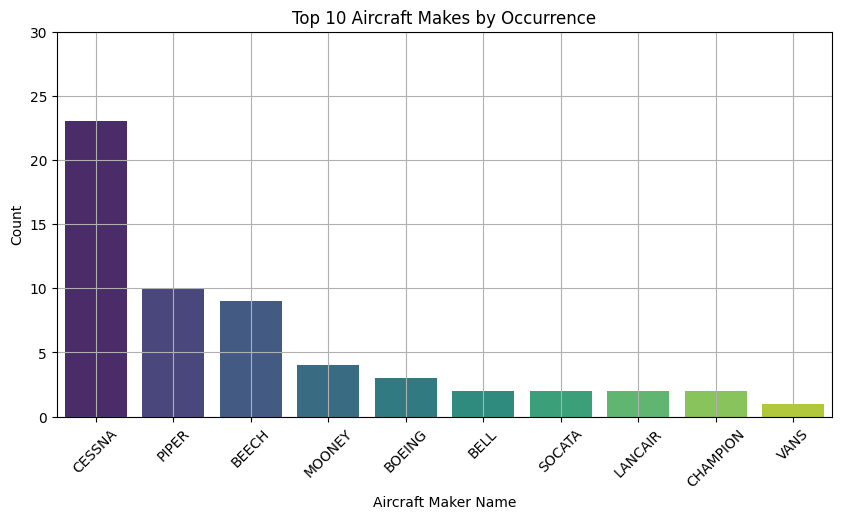

In [216]:
# 1. Top 10 most frequent aircraft makes
plt.figure(figsize=(10,5))
top_aircraft = df['ACFT_MAKE_NAME'].value_counts().head(10)
sns.barplot(x=top_aircraft.index, y=top_aircraft.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft Makes by Occurrence')
plt.xlabel('Aircraft Maker Name')
plt.ylabel('Count')

plt.xticks(range(0, 10, 1))    # X-axis grid spacing: start, stop, step
plt.yticks(range(0, 35, 5))
plt.grid(True)

plt.show()